## Data analysis on covid cases evolving in Uruguay

The data for this analysis comes from the [Our World In Data](https://github.com/owid/covid-19-data) GitHub repository, which is updated daily.

#### Importing necessary packages

In [1]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading data from the source

In [2]:
# Reading data and storing in pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
print('dataframe has: {} rows'.format(df.shape[0]))

dataframe has: 103609 rows


#### Extracting a subset of data

In [3]:
# Selecting a subset of data corresponding to the location Uruguay
uy = df[df["location"] == "Uruguay"]
# Printing first 5 rows
uy.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
98733,URY,South America,Uruguay,2020-03-13,4.0,4.0,NaN,NaN,NaN,NaN,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
98734,URY,South America,Uruguay,2020-03-14,6.0,2.0,NaN,NaN,NaN,NaN,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
98735,URY,South America,Uruguay,2020-03-15,8.0,2.0,NaN,NaN,NaN,NaN,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
98736,URY,South America,Uruguay,2020-03-16,29.0,21.0,NaN,NaN,NaN,NaN,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
98737,URY,South America,Uruguay,2020-03-17,50.0,21.0,NaN,NaN,NaN,NaN,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN


In [4]:
# How many rows has the new dataframe?
print('dataframe has: {} rows'.format(uy.shape[0]))

dataframe has: 494 rows


##### Displaying the last records that were updated in the database

In [6]:
# Display
uy.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
99222,URY,South America,Uruguay,2021-07-15,378041.0,337.0,391.857,5865.0,11.0,13.286,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
99223,URY,South America,Uruguay,2021-07-16,378480.0,439.0,368.286,5871.0,6.0,11.571,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
99224,URY,South America,Uruguay,2021-07-17,378733.0,253.0,350.286,5879.0,8.0,10.286,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
99225,URY,South America,Uruguay,2021-07-18,378875.0,142.0,328.000,5883.0,4.0,9.714,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
99226,URY,South America,Uruguay,2021-07-19,379072.0,197.0,313.714,5889.0,6.0,8.000,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN


#### Creating separate columns for day, month and year

In [7]:
# Creating separate columns for day, month and year
uy['year'] = pd.DatetimeIndex(uy['date']).year
uy['month'] = pd.DatetimeIndex(uy['date']).month
uy['month'] = uy['month'].apply(lambda x: calendar.month_abbr[x])
uy['day'] = pd.DatetimeIndex(uy['date']).day

#Selecting data for 2021 year only
uy21 = uy[uy["year"] == 2021]

<ipython-input-7-90946e2be140>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uy['year'] = pd.DatetimeIndex(uy['date']).year
<ipython-input-7-90946e2be140>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uy['month'] = pd.DatetimeIndex(uy['date']).month
<ipython-input-7-90946e2be140>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [8]:
# How many rows has the new dataframe?
print('dataframe has: {} rows'.format(uy21.shape[0]))

dataframe has: 200 rows


#### Visualizing the data for the cases that occurred in Uruguay during 2021

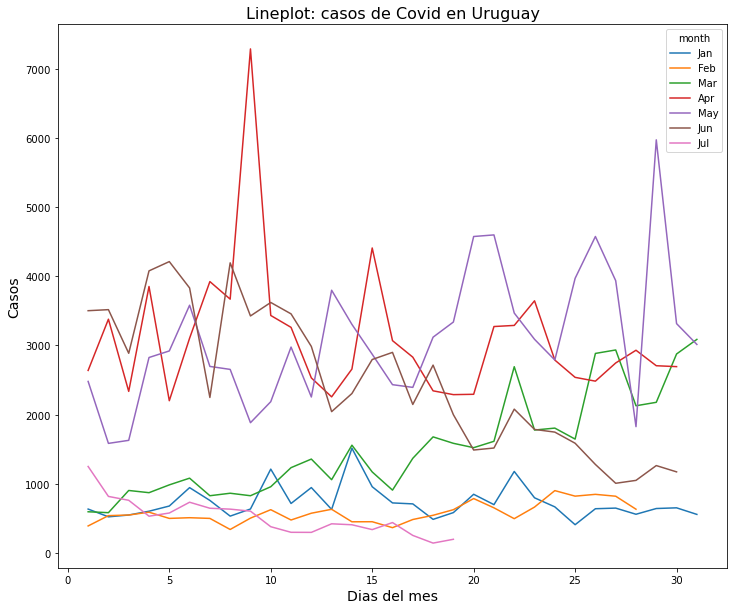

In [9]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=0)
sns.lineplot(x="day",
            y="new_cases",
            hue="month",
            data=uy21)
plt.ylabel("Casos", size=14)
plt.xlabel("Dias del mes", size=14)
plt.title("Lineplot: casos de Covid en Uruguay", size=16)

# Utilizando la funcion plt.show() se logra visualizar la grafica
plt.show()